In [2]:
from dotenv import  load_dotenv
load_dotenv()

True

In [7]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="deepseek-r1-distill-llama-70b")

llm.invoke("Is RPA dead as technology?")

AIMessage(content='<think>\n\n</think>\n\nNo, Robotic Process Automation (RPA) is not dead as a technology. In fact, RPA continues to evolve and is widely adopted across various industries to automate repetitive, rule-based tasks. It has become a key component of digital transformation strategies, helping organizations improve efficiency, reduce errors, and lower operational costs.\n\nWhile RPA is often complemented by other technologies like Artificial Intelligence (AI) and Machine Learning (ML) to enhance its capabilities, the core concept of RPA remains relevant and effective. Many organizations are integrating RPA with more advanced automation tools to create end-to-end automation solutions.\n\nThat said, the RPA market is maturing, and as with any technology, it is evolving to meet new challenges and demands. The rise of intelligent automation, which combines RPA with AI, is an example of this evolution. However, RPA itself is not obsolete; it is adapting and growing within the br

In [8]:
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [9]:
@tool
def multiply(x: int, y: int) -> int:
    """Multiplies two numbers."""
    return x * y

In [10]:
multiply({"x":2, "y":3})

C:\Users\Smartphone Garage\AppData\Local\Temp\ipykernel_10784\4161870413.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  multiply({"x":2, "y":3})


6

In [11]:
@tool
def search(query: str):
    """search the web for a query and return the results"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return f"Result for {query} is: \n{result}"

In [12]:
print(search.invoke({"query":"What is the capital of France?"}))

Result for What is the capital of France? is: 
[{'title': 'What is the Capital of France? - Mappr', 'url': 'https://www.mappr.co/capital-cities/france/', 'content': 'mappr logo\nmappr logo\n\nHome » Capital Cities » What is the Capital of France?\n\n# What is the Capital of France?\n\nParis is the capital of France. Also known as the “City of Light,” is not only the capital but also the most populous city of France. Paris is renowned globally for its art, fashion, gastronomy, and culture.\n\nA map showing France in yellow with surrounding countries in white, major cities marked, and Paris highlighted with a black dot. [...] However, Paris only became the official capital of France during the reign of Clovis I, in the late 5th and early 6th century. Before Clovis, the Merovingian kings did not rule from a fixed capital, but Clovis established his court in Paris, effectively making it the capital. Since then, with some interruptions, Paris has remained the capital of France. [...] The Pa

In [13]:
tools = [multiply, search]

In [14]:
llm_with_tools=llm.bind_tools(tools)

In [16]:
result=llm_with_tools.invoke("what is current gdp of india?")

In [17]:
result.tool_calls

[{'name': 'search',
  'args': {'query': 'current GDP of India 2024'},
  'id': 'r7vhp2zga',
  'type': 'tool_call'}]

In [18]:
tool=result.tool_calls[0]["name"]

In [19]:
query=result.tool_calls[0]["args"]

In [21]:
tool

'search'

In [22]:
query

{'query': 'current GDP of India 2024'}

In [23]:
tool_mapping={tool.name:tool for tool in tools}

In [24]:
tool_mapping

{'multiply': StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000002BD1052A0C0>),
 'search': StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000002BD0F269BC0>)}

In [25]:
#tool_mapping[result.tool_calls[0]["name"]].invoke(result.tool_calls[0]["args"])
tool_mapping[tool].invoke(query)

"Result for current GDP of India 2024 is: \n[{'title': 'India GDP - Gross Domestic Product 2024 | countryeconomy.com', 'url': 'https://countryeconomy.com/gdp/india?year=2024', 'content': 'The GDP figure in 2024 was €3,612,664$3,909,097 million, leaving India placed 5th in the ranking of GDP of the 196 countries that we publish. The absolute value of GDP in India rose €248,613$270,607 million with respect to 2023. [...] The GDP per capita of India in 2024 was €2,512$2,718, €173$188 higher than in 2023, it was €2,339$2,530. To view the evolution of the GDP per capita, it is interesting to look back a few years and compare these data with those of 2014 when the GDP per capita in India was €1,169$1,557.\\n\\nIf we order the countries according to their GDP per capita, India is in 142th position, its population has a low level of affluence compare tothe 196 countries whose GDP we publish. [...] ## Main navigation\\n\\nFacebook\\nTwitter\\n\\n## Top menu\\n\\n# India India GDP - Gross Domest

In [31]:
from typing import TypedDict, Sequence, Annotated
from langchain_core.messages import BaseMessage
from langgraph.graph import StateGraph, START,END
import operator

In [27]:
class AgentState(TypedDict):
    """State for the agent."""
    messages: Annotated[Sequence[BaseMessage],operator.add]

In [28]:
def invoke_model(state:AgentState):
    pass

In [29]:
def router(state):
    pass

In [30]:
def invoke_tool(state:AgentState):
    pass

In [32]:
graph=StateGraph(AgentState)

In [33]:
graph.add_node("ai_assistant", invoke_model)

eariler we were using the tool node from list of tool

but now we have create tool invoke(custom funtion)

why we are doing it: as a user if we want to take a authority to which i need to give permission for execution

In [34]:
graph.add_node("tool", invoke_tool)

In [35]:
graph.add_conditional_edges("ai_assistant",
                            router,
                            {
                                "tool":"tool",
                                "end":END
                            }
                            )

In [36]:
graph.add_edge("tool", END)

In [37]:
graph.set_entry_point("ai_assistant")

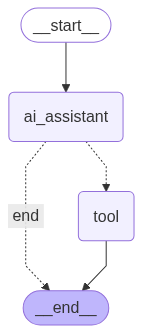

In [38]:
graph.compile()